## Build a simple workflow or Graph using LangGraph

- First define the state of the workflow using `State` class.
- Then create nodes using `Node` class and define their operations.
- The state schema serves as the input/output structure for the `Nodes` and `Edges`.
- Connect the nodes to form a graph using `Graph` class.
- `Graph` class will manage the execution flow between nodes.
- Finally, execute the graph to see the workflow in action.


In [ ]:
# Use the type dict class from Python typing module as our schema
#A state in LangGraph is a shared data structure that acts as the application's memory, holding the current snapshot of information for the graph's execution

from typing_extensions import TypedDict
class State(TypedDict):
    graph_info:str

## Nodes
Nodes are the building blocks of a graph. Each node represents a specific operation or task within the workflow. Nodes can take inputs, perform computations, and produce outputs that can be used by other nodes in the graph.

Nodes are just Python functions 


In [2]:
def start_play(state: State):
    print("Start Play node has been called.")
    return {"graph_info":state['graph_info'] + "I am planning to play"}
def cricket(state: State):
    print("Cricket node has been called.")
    return {"graph_info":state['graph_info'] + "I will play cricket"}
def football(state: State):
    print("football node has been called.")
    return {"graph_info":state['graph_info'] + "I will play football"}

In [3]:
import random
from typing import Literal
def choose_sport(state: State) -> Literal['cricket', 'football']:
    sport = random.choice(['cricket', 'football'])
    print(f"Chosen sport: {sport}")
    return sport

## Graph Construction and Execution
Now we build the graph from our components defined above.
StateGraph class will help us to connect the nodes and manage the execution flow.
First we initialize the graph with the starting node.
Then we add nodes and edges to define the workflow.
Finally, we execute the graph with an initial state to see the results.

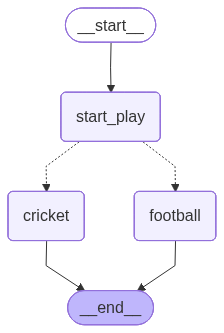

In [4]:
from IPython.display import display, Image
from langgraph.graph import StateGraph, START, END

# Build the graph
graph = StateGraph(State)

# Adding the nodes
graph.add_node("start_play", start_play)
#graph.add_node("choose_sport", choose_sport)
graph.add_node("cricket", cricket)
graph.add_node("football", football)

# Adding the edges
graph.add_edge(START, "start_play")
graph.add_conditional_edges("start_play", choose_sport)
graph.add_edge("cricket",END)
graph.add_edge("football",END)

#Compile the graph
graph_built = graph.compile()

# Visualize the graph
display(Image(graph_built.get_graph().draw_mermaid_png()))

In [5]:
graph_built.invoke({"graph_info":"My Game"})

Start Play node has been called.
Chosen sport: cricket
Cricket node has been called.


{'graph_info': 'My GameI am planning to playI will play cricket'}